In [1]:
# all imports
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# defining functions

# reads xml-data

def read_data(file):
    with open(file, 'r') as f:
        data = f.read()
    bs_data = bs(data, 'xml') 
    return bs_data


# gets the bname for calculations
def get_bname(path):
    for xml_file in os.listdir(path):
        if xml_file.startswith("timeseries"):
            bs_data = read_data(path + xml_file)
            b_name = bs_data.find_all('name')
            return b_name    


# returns a dataframe given some data
def values_df(bs_data, low, high):
    b_name = bs_data.find_all('name')
    attributes = []
    # finds all values 
    for i in range(len(b_name)):
        attributes.append(b_name[i].get('value'))

    attributes = list(attributes)
    collection = {}
    
    # finds x-, y- and z-values and computes euclidian distance
    for i in range(low, high):
        r = calc(b_name, i)
        collection[attributes[i]] = r

    df = pd.DataFrame(collection)
    return df


# calculates the euclidian values
def calc(b_name, i):
    a1 = b_name[i].find_all('component')[0].get('data')
    b1 = b_name[i].find_all('component')[1].get('data')
    c1 = b_name[i].find_all('component')[2].get('data')
    x = np.asarray([float(x) for x in a1.split(',')])
    y = np.asarray([float(y) for y in b1.split(',')])
    z = np.asarray([float(z) for z in c1.split(',')])
    r = (x**2 + y**2 + z**2)**0.5
    return r

# gives mean values from all timeseries in path
def get_mean_value(path, low, high):
    mean_list = []
    
    for xml_file in os.listdir(path):
        if xml_file.startswith("timeseries"):
            try:
                bs_data = read_data(path + xml_file)
                b_name = bs_data.find_all('name')
                
                df1 = values_df(bs_data, low, high)
                mean_list.append(df1)
            except:
                 print(xml_file + " failed to compute")
                
    df = pd.concat(mean_list)
    by_row_index = df.groupby(df.index)
    df_means = by_row_index.mean()
    return df_means

In [3]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [7]:
path = "usethis/Healthy/"
b_name = get_bname(path)

file = "usethis/Healthy/timeseries-17.xml"
bs_data = read_data(file)

df_lv1 = values_df(bs_data, 0, int(len(b_name)/4))
#display(df_lv1)
corrMatrix = df_lv1.corr()
#display(corrMatrix)

,Head Angles,L_FCC_VLab,L_FM2_VLab,Left Ankle Angles,Left Foot Contact Angle,Left Foot Progression,Left Hip Angles,Left Knee Angles,Left Pelvic Angles,Left Shoulder Angles,...,Right Hip Angles,Right Knee Angles,Right Pelvic Angles,Right Shoulder Angles,Right Shoulder_Pelvis Angle,Right Wrist Angles,Right_Knee_Ankle_distance,Right_Knee_VLab,Trunk Angles,Trunk Angles_wrt_LAB
0,52.703305,71.949231,61.695755,4.869359,32.768558,32.768558,90.546739,104.247852,22.649485,81.309133,...,91.080597,107.725887,22.316843,82.283698,4.478783,33.004250,45.521337,22.652354,29.747983,52.034938
1,52.706700,71.561755,61.041014,5.178898,31.508585,31.508585,90.890043,103.617198,22.634577,81.275442,...,91.753799,107.462473,22.362988,82.236334,4.543509,32.993660,45.521377,22.459587,29.713154,52.043120
2,52.707638,71.233405,60.457783,5.493041,30.222520,30.222520,91.237276,102.863552,22.616153,81.240218,...,92.367944,107.065648,22.408083,82.195557,4.615509,32.983812,45.521360,22.300603,29.683507,52.054577
3,52.705708,70.969872,59.948502,5.817535,28.906516,28.906516,91.397404,101.989810,22.594430,81.204861,...,92.877240,106.539688,22.451595,82.161248,4.693290,32.974842,45.521368,22.171764,29.659450,52.069141
4,52.700542,70.777028,59.515879,6.158952,27.556701,27.556701,91.444913,100.998298,22.569253,81.170421,...,93.292544,105.887683,22.492430,82.133079,4.775263,32.966984,45.521385,22.069887,29.642051,52.086769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,52.801934,73.965722,64.923225,3.622779,37.537420,37.537420,88.090134,105.532539,22.662459,81.319515,...,87.657601,107.447045,22.179013,82.473101,4.392425,33.066660,45.521291,23.786555,29.878441,52.030219
97,52.805228,73.403151,64.022986,3.936192,36.351482,36.351482,88.832732,105.393285,22.669086,81.305813,...,88.629934,107.730657,22.231251,82.402701,4.418902,33.053402,45.521280,23.428788,29.819097,52.023226
98,52.807522,72.876225,63.178042,4.249404,35.148473,35.148473,89.478367,105.130292,22.668643,81.287557,...,89.523369,107.877687,22.282125,82.337911,4.456850,33.040295,45.521283,23.115783,29.766498,52.020789
99,52.808827,72.390278,62.392811,4.559987,33.927988,33.927988,90.038630,104.743688,22.662148,81.265065,...,90.338738,107.887758,22.331748,82.279095,4.505164,33.027470,45.521318,22.845550,29.720130,52.022536


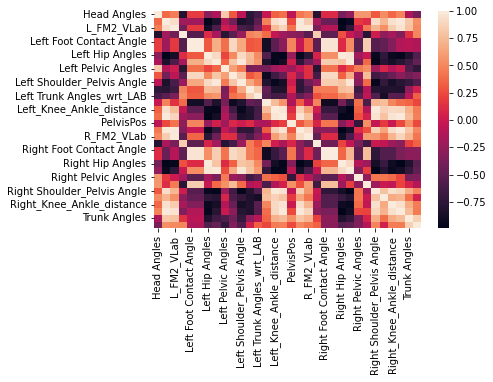

In [5]:
sns.heatmap(corrMatrix)
plt.show()

In [8]:
print("Top Absolute Correlations for timeserie 17 pl 1")
print("=============================================")
print(get_top_abs_correlations(df_lv1, 10))
print("")

Top Absolute Correlations for timeserie 17 pl 1
Left Foot Contact Angle   Left Foot Progression          1.000000
Right Foot Contact Angle  Right Foot Progression         1.000000
R_FCC_VLab                Right Hip Angles               0.994404
L_FCC_VLab                Right Hip Angles               0.993510
                          Left Hip Angles                0.992258
Right Knee Angles         Right Shoulder_Pelvis Angle    0.992056
R_FCC_VLab                Right_Knee_VLab                0.991588
Right Hip Angles          Right_Knee_VLab                0.991183
Left Hip Angles           Left_Knee_VLab                 0.991092
Left Knee Angles          Left Shoulder_Pelvis Angle     0.991089
dtype: float64



In [91]:
# Creates mean of all timesseries for each level
path = "usethis/Healthy/"
b_name = get_bname(path)

df_mean_lv1 = get_mean_value(path, 0, int(len(b_name)/4)) # level 1
df_mean_lv2 = get_mean_value(path, int(len(b_name)/4), int(len(b_name)/2)) # level 2
df_mean_lv3 = get_mean_value(path, int(len(b_name)/2), int(3*len(b_name)/4)) # level 3
df_mean_lv4 = get_mean_value(path, int(3*len(b_name)/4), int(len(b_name))) # level 4

timeseries-44.xml failed to compute
timeseries-10.xml failed to compute
timeseries-10.xml failed to compute
timeseries-10.xml failed to compute
timeseries-23.xml failed to compute
timeseries-57.xml failed to compute
timeseries-63.xml failed to compute
timeseries-10.xml failed to compute


In [92]:
print("Top Absolute Correlations for power level 1")
print("=============================================")
print(get_top_abs_correlations(df_mean_lv1, 10))
print("")

print("Top Absolute Correlations for power level 2")
print("=============================================")
print(get_top_abs_correlations(df_mean_lv2, 10))
print("")

print("Top Absolute Correlations for power level 3")
print("=============================================")
print(get_top_abs_correlations(df_mean_lv3, 10))
print("")

print("Top Absolute Correlations for power level 4")
print("=============================================")
print(get_top_abs_correlations(df_mean_lv4, 10))
print("")

Top Absolute Correlations for power level 1
Left Foot Contact Angle   Left Foot Progression       1.000000
Right Foot Contact Angle  Right Foot Progression      1.000000
L_FCC_VLab                Right Hip Angles            0.997258
Left Knee Angles          Right Knee Angles           0.994110
Left Foot Contact Angle   Right Foot Progression      0.993911
                          Right Foot Contact Angle    0.993911
Left Foot Progression     Right Foot Contact Angle    0.993911
                          Right Foot Progression      0.993911
L_FM2_VLab                R_FM2_VLab                  0.993460
L_FCC_VLab                R_FCC_VLab                  0.993295
dtype: float64

Top Absolute Correlations for power level 2
Left Foot Contact Angle   Left Foot Progression       1.000000
Right Foot Contact Angle  Right Foot Progression      1.000000
L_FCC_VLab                Right Hip Angles            0.996927
Left Foot Contact Angle   Right Foot Contact Angle    0.995109
              